In [1]:
%matplotlib inline

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt

tf.set_random_seed(342)
np.random.seed(685)

# Get the data
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston
total_features, total_prices = load_boston(True)     # return (data, target) : tuple if return_X_y is True
print(total_features.data.shape)
print(total_features)
print(total_features[0,:])
print(total_prices.data.shape)
print(total_prices)

###
# preparing dataset
train_features = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=train_features.shape)
# train_prices =train_features^2
train_prices = np.power(train_features, 2) + noise                          # shape (100, 1) + white noise

# plot data
plt.scatter(train_features, train_prices)
plt.show()


(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
(506,)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 

<Figure size 640x480 with 1 Axes>

In [2]:
file=load_boston(False)['filename']
print(file)
dataset = pd.read_csv(file,header=1)
dataset.head()

C:\Users\user\Anaconda3\envs\huyenanh_scikit-learn\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


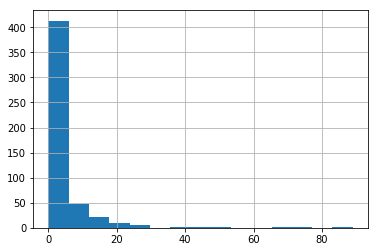

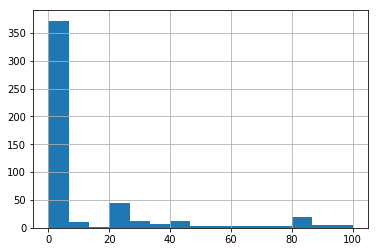

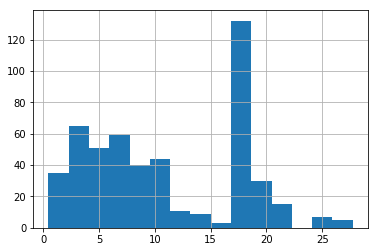

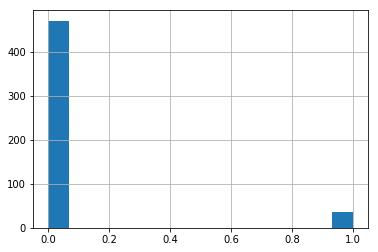

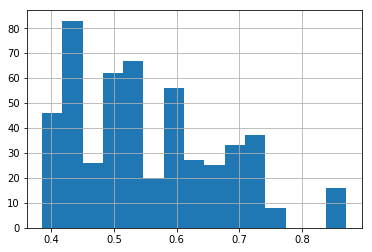

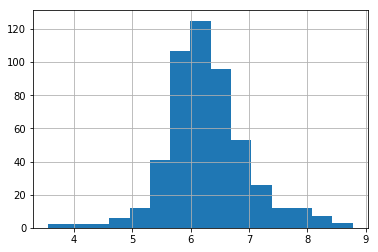

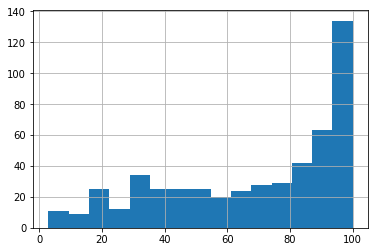

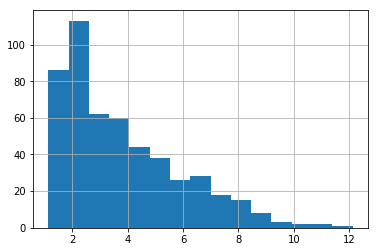

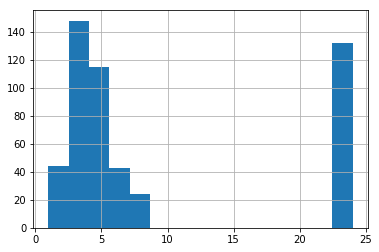

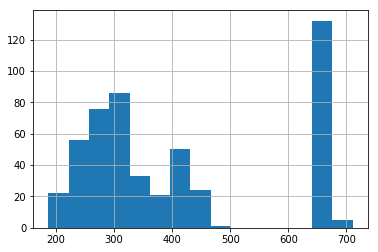

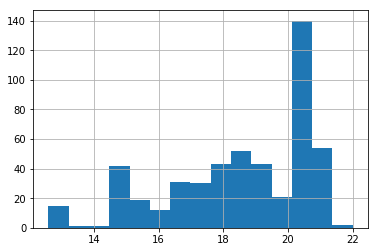

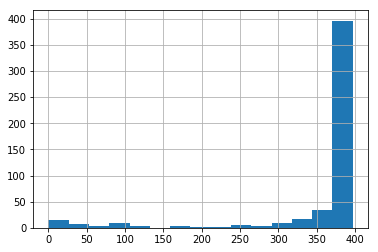

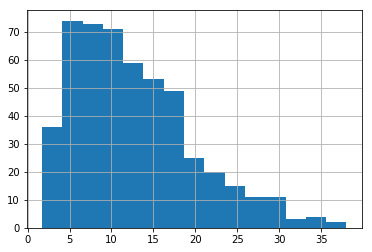

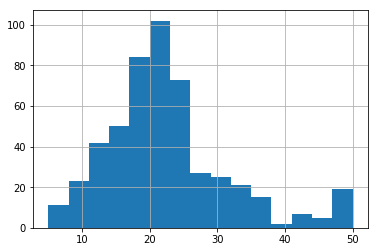

In [3]:
for item in dataset.columns:
    #print(item,type(item))
    dataset[item].hist(bins = 15)
    plt.show()

Standardization of datasets is a common requirement for many machine learning estimators.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

In [4]:
# constructing NN
# https://www.tensorflow.org/api_docs/python/tf/placeholder
tf_train_features = tf.placeholder(tf.float32, train_features.shape)     # input x  train_features
tf_train_prices = tf.placeholder(tf.float32, train_prices.shape)     # input y  train_prices

# neural network layers
# https://www.tensorflow.org/api_docs/python/tf/layers/dense
l1 = tf.layers.dense(tf_train_features, 10, tf.nn.relu)          # hidden layer
output = tf.layers.dense(l1, 1)                     # output layer

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


![nn](https://imgur.com/a/Cbmj1fn)

In [5]:
# https://www.tensorflow.org/api_docs/python/tf/losses/mean_squared_error
loss = tf.losses.mean_squared_error(tf_train_prices, output)   # compute cost

# https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)

# https://www.tensorflow.org/api_docs/python/tf/Session
sess = tf.Session()                                 # control training and others
sess.run(tf.global_variables_initializer())         # initialize var in graph

Instructions for updating:
Use tf.cast instead.


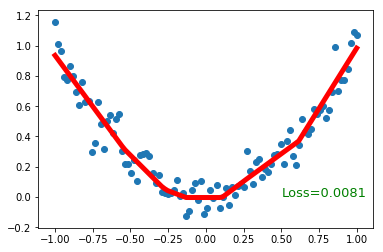

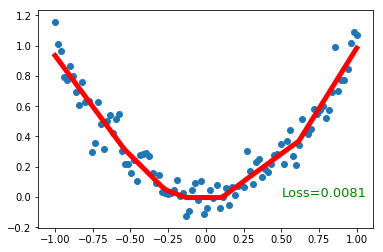

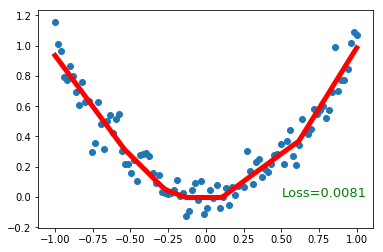

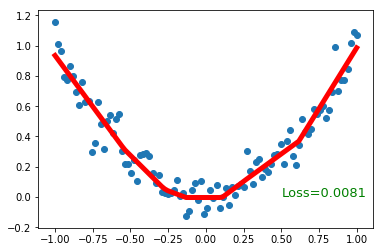

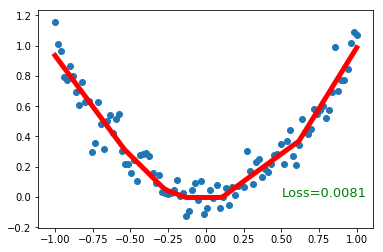

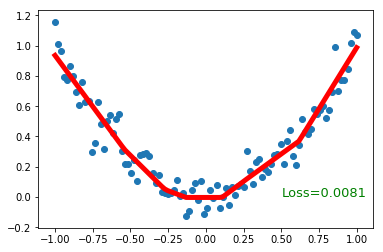

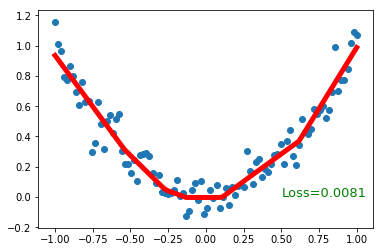

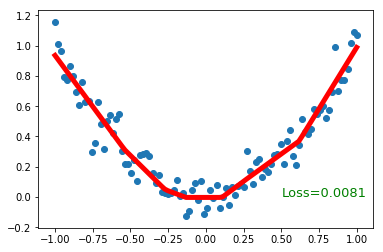

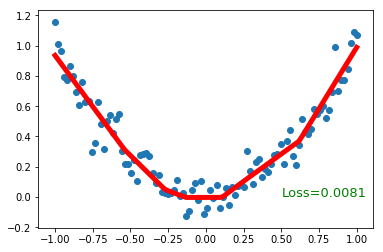

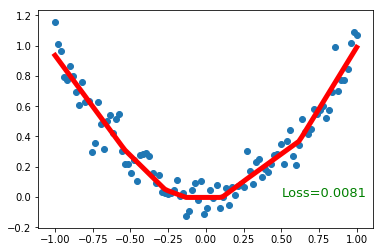

In [11]:
plt.ion()   # something about plotting

for step in range(100):
    # train and net output
    _, l, pred = sess.run([train_op, loss, output], {tf_train_features: train_features, tf_train_prices: train_prices})
    if step % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(train_features, train_prices)
        plt.plot(train_features, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 13, 'color': 'green'})
        plt.pause(0.1)

plt.ioff()
plt.show()